<h1 align="center">Multiple Linear Regression</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split 
from scipy import stats

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  #p2(başarı oranını gösterir)

from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')  

# <font color=purple>E.D.A</font>

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.shape

(200, 4)

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [9]:
df['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

In [10]:
stats.ttest_ind(df['TV'],df['Sales'])

Ttest_indResult(statistic=21.87105520413898, pvalue=3.287531216460733e-70)

## <font color=PURPLE>MODELING</font>

In [11]:
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [12]:
x=pd.get_dummies(x,drop_first=True)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [14]:
lr=LinearRegression()

In [15]:
model=lr.fit(x_train, y_train)

In [16]:
tahmin=model.predict(x_test)

In [17]:
r2_score(tahmin,y_test)

0.8791069137120033

In [28]:
x=df[['Radio','Newspaper']]
y=df['Sales']
 # burada TV sutunun çıkararak tekrar bir model denedim, r2 çok düşük çıktı, yani tv reklamlarının satışa katkısı yüksek demek oluyor.

In [29]:
x=pd.get_dummies(x,drop_first=True)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
lr=LinearRegression()

In [32]:
model=lr.fit(x_train, y_train)

In [33]:
tahmin=model.predict(x_test)

In [34]:
r2_score(tahmin,y_test)

-1.5018490458770373

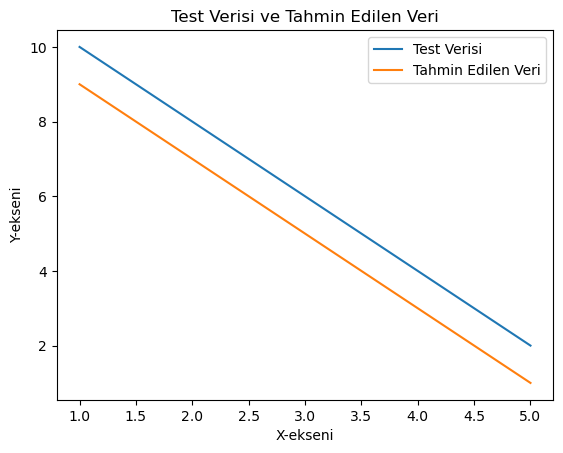

In [19]:

x_test=[1, 2, 3, 4, 5]  # Test verisi için X-ekseni değerleri
y_test=[10, 8, 6, 4, 2]  # Test verisi için Y-ekseni değerleri
x_pred=[1, 2, 3, 4, 5]  # Tahmin edilen veri için X-ekseni değerleri
y_pred=[9, 7, 5, 3, 1]   # Tahmin edilen veri için Y-ekseni değerleri

# Line chart oluşturma
plt.plot(x_test, y_test, label='Test Verisi')
plt.plot(x_pred, y_pred, label='Tahmin Edilen Veri')

# Eksen etiketleri ve başlık ekleme
plt.xlabel('X-ekseni')
plt.ylabel('Y-ekseni')
plt.title('Test Verisi ve Tahmin Edilen Veri')
plt.legend()
plt.show()                                                 #Kod Poe'den